## Fitting model to data

model answer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
%matplotlib inline

Read in data

In [7]:

am1_data = np.genfromtxt('Am1_L.txt')
am2_data = np.genfromtxt('Am2_L.txt')
am3_data = np.genfromtxt('Am3_L.txt')


x1 = am1_data[:,0] # conc
y1 = am1_data[:,1] # response
z1 = am1_data[:,2] # standard deviation

x2 = am2_data[:,0] # conc
y2 = am2_data[:,1] # conc
z2 = am2_data[:,2] # standard deviation

x3 = am3_data[:,0] # conc
y3 = am3_data[:,1] # response
z3 = am3_data[:,2] # standard deviation



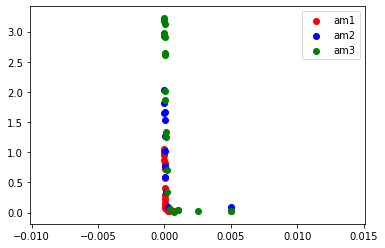

In [8]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x1,y1,c='red',label='am1')
ax.scatter(x2,y2,c='blue',label='am2')
ax.scatter(x3,y3,c='green',label='am3')
ax.legend() 
plt.show()

The linear scale makes it hard to see what's going on, so we replot on a semilog scale.

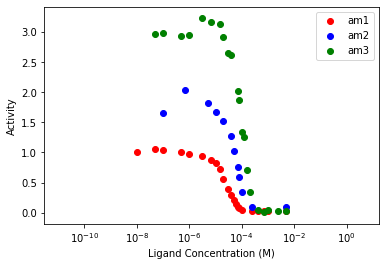

In [9]:
logfig = plt.figure()
logax = logfig.add_subplot(1, 1, 1)
logax.set_xscale('log')
logax.scatter(x1,y1,c='red',label='am1')
logax.scatter(x2,y2,c='blue',label='am2')
logax.scatter(x3,y3,c='green',label='am3')
logax.set_xlabel('Ligand Concentration (M)')
logax.set_ylabel('Activity')
logax.legend() 
plt.show()

Log scale much better.

Now we write a function to predict activity from a concentration, given the model.

In [14]:
def predict_activity(L,x):
    """ Given ligand concentrations L, and parameters x, predict activities A"""
    a,N,E,Koff,Kon = x
    A = np.divide(a, (1+ np.exp(N* (E + np.log( (1 + np.divide(L,Koff))/(1 + np.divide(L,Kon)))))))
    return A

The loss function gives the sum of squared differences between the model and measured data. 

In [15]:
def loss(x,L,data):
    """squared difference between measured and predicted activity, for an array of data, and parameters x)"""
    diff = np.sum((predict_activity(L,x)-data)**2)
    return diff

We now minimize the loss by adjusting the model parameters with the <code>scipy.optimize.minimize function</code>. This function takes the loss function, and other parameters.


In [33]:
#initial guess
x0_guess=np.array([2,3,-2,0.00005,0.0005])

# minimize provides a unified interface to all of scipy's solvers.
# We'll use the Nelder-Mead solver, we also need to hand it x1 and y1
res = scipy.optimize.minimize(loss, x0_guess, method='Nelder-Mead', args=(x1,y1)) #x1 and y1 are concentration and response (L, data)
x_fit = res['x'] # fitted parameter values
x_fit

array([ 1.35566303e+00,  4.84892326e+00, -2.30981518e-01,  5.52798565e-05,
        8.18423468e-04])

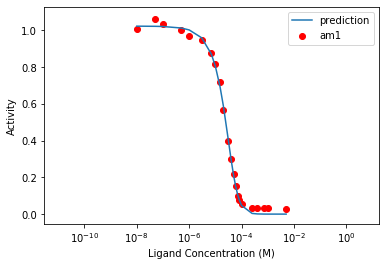

In [34]:
logfig = plt.figure()
logax = logfig.add_subplot(1, 1, 1)
logax.set_xscale('log')
logax.scatter(x1,y1,c='red',label='am1')
logax.plot(x1, predict_activity(x1,x_fit),label='prediction') # plot predictions from parameters
logax.set_xlabel('Ligand Concentration (M)')
logax.set_ylabel('Activity')
logax.legend() 
plt.show()

This fits for the am1 data. Can you do this for am2 and am3 too?

In [35]:
#initial guess
x0_guess=np.array([2,3,-2,0.00005,0.0005])

# minimize provides a unified interface to all of scipy's solvers.
# We'll use the Nelder-Mead solver, we also need to hand it x1 and y1
res = scipy.optimize.minimize(loss, x0_guess, method='Nelder-Mead', args=(x2,y2)) #x1 and y1 are concentration and response (L, data)
x_fit = res['x'] # fitted parameter values
x_fit

array([ 2.05715092e+00,  7.17360811e+00, -2.93947102e-01,  1.17942558e-04,
        7.79562287e-04])

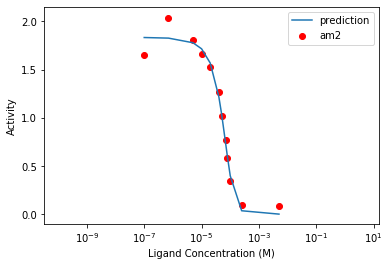

In [36]:
logfig = plt.figure()
logax = logfig.add_subplot(1, 1, 1)
logax.set_xscale('log')
logax.scatter(x2,y2,c='red',label='am2')
logax.plot(x2, predict_activity(x2,x_fit),label='prediction') # plot predictions from parameters
logax.set_xlabel('Ligand Concentration (M)')
logax.set_ylabel('Activity')
logax.legend() 
plt.show()

----

In [37]:
#initial guess
x0_guess=np.array([2,3,-2,0.00005,0.0005])

# minimize provides a unified interface to all of scipy's solvers.
# We'll use the Nelder-Mead solver, we also need to hand it x1 and y1
res = scipy.optimize.minimize(loss, x0_guess, method='Nelder-Mead', args=(x3,y3)) #x1 and y1 are concentration and response (L, data)
x_fit = res['x'] # fitted parameter values
x_fit

array([ 3.07609521e+00,  2.75814664e+00, -1.69616996e+00,  2.13239159e-05,
        9.61066977e-02])

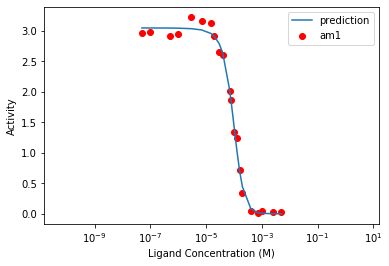

In [38]:
logfig = plt.figure()
logax = logfig.add_subplot(1, 1, 1)
logax.set_xscale('log')
logax.scatter(x3,y3,c='red',label='am1')
logax.plot(x3, predict_activity(x3,x_fit),label='prediction') # plot predictions from parameters
logax.set_xlabel('Ligand Concentration (M)')
logax.set_ylabel('Activity')
logax.legend() 
plt.show()